# Exercise 6

## Predict rating using LSTM


In [ ]:
import pandas as pd

In [ ]:
dataTraining = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTesting.zip', encoding='UTF-8', index_col=0)
dataTraining

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6
...,...,...,...,...,...
8417,2010,Our Family Wedding,""" our marriage , their wedding . "" it ' s l...","['Comedy', 'Romance']",4.9
1592,1984,Conan the Destroyer,"the wandering barbarian , conan , alongside ...","['Action', 'Adventure', 'Fantasy']",5.8
1723,1955,Kismet,"like a tale spun by scheherazade , kismet fol...","['Adventure', 'Musical', 'Fantasy', 'Comedy', ...",6.4
7605,1982,The Secret of NIMH,"mrs . brisby , a widowed mouse , lives in a...","['Animation', 'Adventure', 'Drama', 'Family', ...",7.6


In [ ]:
dataTraining = dataTraining.drop(['year', 'title', 'genres'], axis=1)
dataTraining

,plot,rating
3107,most is the story of a single father who takes...,8.0
900,a serial killer decides to teach the secrets o...,5.6
6724,"in sweden , a female blackmailer with a disfi...",7.2
4704,"in a friday afternoon in new york , the presi...",7.4
2582,"in los angeles , the editor of a publishing h...",6.6
...,...,...
8417,""" our marriage , their wedding . "" it ' s l...",4.9
1592,"the wandering barbarian , conan , alongside ...",5.8
1723,"like a tale spun by scheherazade , kismet fol...",6.4
7605,"mrs . brisby , a widowed mouse , lives in a...",7.6


In [ ]:
X = dataTraining['plot']
y = (dataTraining['rating'] >= dataTraining['rating'].mean()).astype(int)

In [ ]:
X

3107    most is the story of a single father who takes...
900     a serial killer decides to teach the secrets o...
6724    in sweden ,  a female blackmailer with a disfi...
4704    in a friday afternoon in new york ,  the presi...
2582    in los angeles ,  the editor of a publishing h...
                              ...                        
8417    " our marriage ,  their wedding .  "  it ' s l...
1592    the wandering barbarian ,  conan ,  alongside ...
1723    like a tale spun by scheherazade ,  kismet fol...
7605    mrs .  brisby ,  a widowed mouse ,  lives in a...
215     tinker bell journey far north of never land to...
Name: plot, Length: 7895, dtype: object

In [ ]:
y

3107    1
900     0
6724    1
4704    1
2582    1
       ..
8417    0
1592    0
1723    0
7605    1
215     1
Name: rating, Length: 7895, dtype: int64

# Exercise 6.1

- Remove stopwords
- Lowercase
- split the text in words
- pad_sequences

In [ ]:
!pip install wget
!pip install livelossplot --quiet

In [ ]:
import keras
from keras.layers import Dense, Activation, Dropout, Reshape, Permute

In [ ]:
import pandas as pd
import numpy as np
import wget
import os
from zipfile import ZipFile

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import string

from sklearn.model_selection import train_test_split

from keras import backend as K
from keras.models import Sequential
from keras.layers import LSTM
# from keras.layers.core import Dense, Dropout
from keras.layers import Embedding
from keras.utils import pad_sequences
from livelossplot import PlotLossesKeras

import matplotlib.pyplot as plt

import gensim
from gensim.models import Word2Vec
import warnings


warnings.filterwarnings('ignore')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))
def preprocess(text):
    text = text.lower()
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

X = X.apply(preprocess)

In [ ]:
X = X.tolist()

In [ ]:
# For vocabulary only the intersec characters is used to avoid issues with data collection
voc = set(''.join(X))
vocabulary = {x: idx + 1 for idx, x in enumerate(set(voc))}

In [ ]:
# Max len
max_len = 150
X = [x[:max_len] for x in X]
# Convert characters to int and pad
X = [[vocabulary[x1] for x1 in x if x1 in vocabulary.keys()] for x in X]

In [ ]:
X_pad = pad_sequences(X, maxlen=max_len)

In [ ]:
# split data into training and validation set
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size = 0.3, random_state = 18)

# Exercise 6.2

Create a SimpleRNN neural network to predict the rating of a movie

Calculate the testing set accuracy

In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [ ]:
# Define the model architecture
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(None, 1)))
model.add(Dense(units=1, activation='sigmoid'))
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
# Make predictions using the model
y_pred = (model.predict(X_test) > 0.5)[:,0].astype("int32")
print((y_pred == y_test).mean())

Epoch 1/10
173/173 [==============================] - 5s 20ms/step - loss: 0.7052 - accuracy: 0.5128
Epoch 2/10
173/173 [==============================] - 4s 22ms/step - loss: 0.6943 - accuracy: 0.5176
Epoch 3/10
173/173 [==============================] - 4s 24ms/step - loss: 0.6936 - accuracy: 0.5228
Epoch 4/10
173/173 [==============================] - 4s 20ms/step - loss: 0.6938 - accuracy: 0.5172
Epoch 5/10
173/173 [==============================] - 3s 20ms/step - loss: 0.6930 - accuracy: 0.5239
Epoch 6/10
173/173 [==============================] - 5s 27ms/step - loss: 0.6932 - accuracy: 0.5215
Epoch 7/10
173/173 [==============================] - 4s 21ms/step - loss: 0.6918 - accuracy: 0.5241
Epoch 8/10
173/173 [==============================] - 3s 20ms/step - loss: 0.6921 - accuracy: 0.5199
Epoch 9/10
173/173 [==============================] - 5s 27ms/step - loss: 0.6911 - accuracy: 0.5221
Epoch 10/10
75/75 [==============================] - 1s 15ms/step
0.5124525116082735


# Exercise 6.3

Create a LSTM neural network to predict the rating of a movie

Calculate the testing set accuracy

In [ ]:
model = Sequential()
model.add(Embedding(len(vocabulary) + 1, 128, input_length=max_len))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 128)          7296      
                                                                 
 lstm (LSTM)                 (None, 32)                20608     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 27937 (109.13 KB)
Trainable params: 27937 (109.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


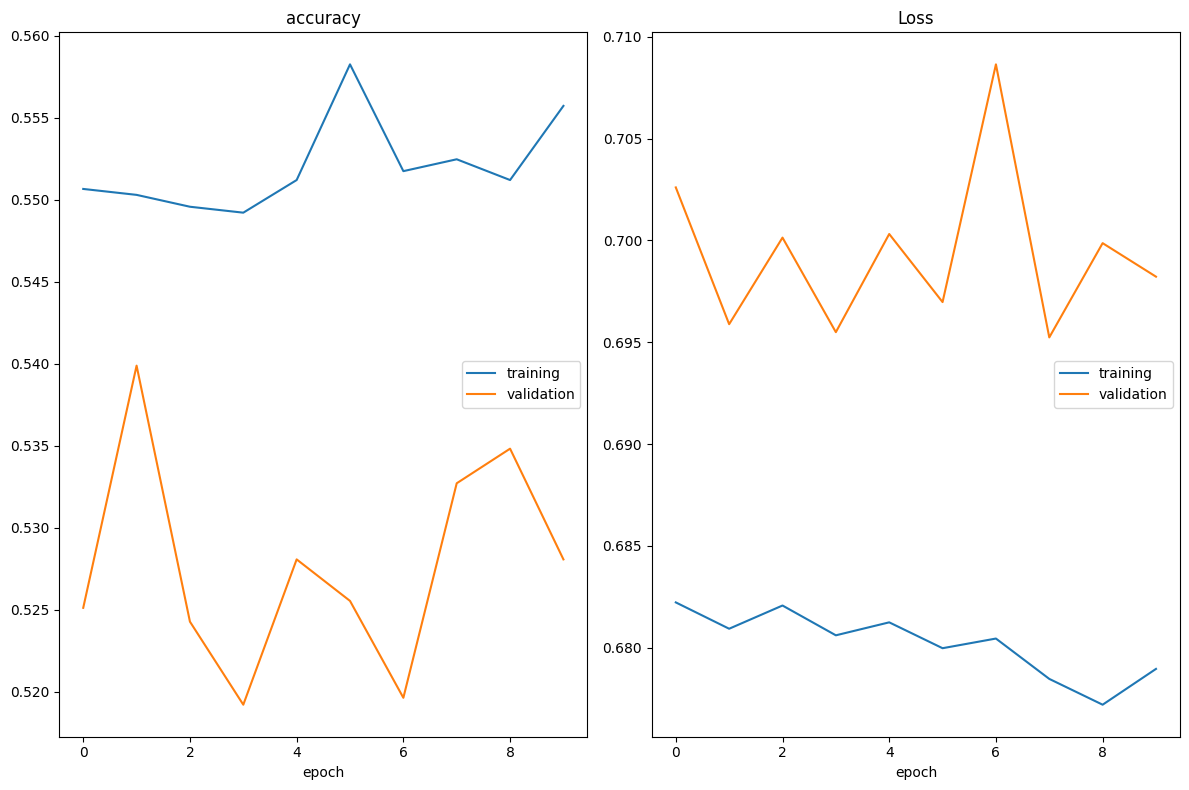

accuracy
	training         	 (min:    0.549, max:    0.558, cur:    0.556)
	validation       	 (min:    0.519, max:    0.540, cur:    0.528)
Loss
	training         	 (min:    0.677, max:    0.682, cur:    0.679)
	validation       	 (min:    0.695, max:    0.709, cur:    0.698)
111/111 [==============================] - 11s 98ms/step - loss: 0.6790 - accuracy: 0.5557 - val_loss: 0.6982 - val_accuracy: 0.5281


In [ ]:
model.fit(X_train, y_train, validation_data=[X_test, y_test],
          batch_size=128, epochs=10, verbose=1,
          callbacks=[PlotLossesKeras()])

In [ ]:
y_pred = (model.predict(X_test) > 0.5)[:,0].astype("int32")
print((y_pred == y_test).mean())

75/75 [==============================] - 1s 16ms/step
0.5280709159983116


# Exercise 6.4

Create a GRU neural network to predict the rating of a movie

Calculate the testing set accuracy

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [ ]:
# Build and train the GRU model
model_gru = Sequential()
model_gru.add(Embedding(len(vocabulary) + 1, 128, input_length=max_len))
model_gru.add(GRU(100))
model_gru.add(Dense(1, activation='softmax'))
model_gru.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1088      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


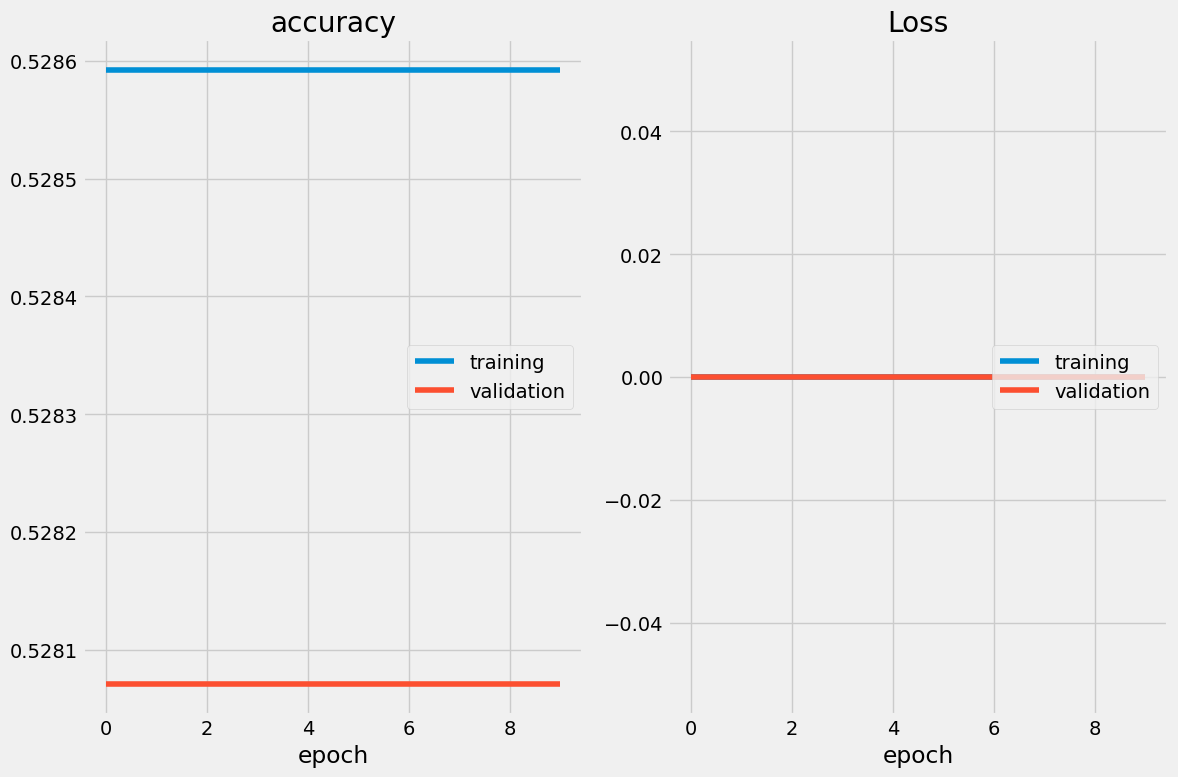

accuracy
	training         	 (min:    0.529, max:    0.529, cur:    0.529)
	validation       	 (min:    0.528, max:    0.528, cur:    0.528)
Loss
	training         	 (min:    0.000, max:    0.000, cur:    0.000)
	validation       	 (min:    0.000, max:    0.000, cur:    0.000)
44/44 [==============================] - 16s 368ms/step - loss: 0.0000e+00 - accuracy: 0.5286 - val_loss: 0.0000e+00 - val_accuracy: 0.5281


In [ ]:
model_gru.fit(X_train, y_train, validation_data=[X_test, y_test],
          batch_size=128, epochs=10, verbose=1,
          callbacks=[PlotLossesKeras()])

In [ ]:
y_pred = (model_gru.predict(X_test) > 0.5)[:,0].astype("int32")
print((y_pred == y_test).mean())

75/75 [==============================] - 3s 34ms/step
0.5280709159983116
